<div class="jumbotron">
  <h1><i class="fa fa-bar-chart" aria-hidden="true"></i> Limpieza de datos</h1>
  <p></p>
</div>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from mlxtend.preprocessing import standardize
from scipy import stats

# Declaración de variables

In [2]:
organismo ="fusarium_oxysporum"
dataset = 2
nombre = ("ds" + str(dataset) + "_" + str(organismo))
nombre2 = (str(organismo)+ " dataset " + str(dataset))
r2 = ("Datos/resultados/"+ str(organismo) + "/" + str(nombre) + "/transformaciones/sin_filtrar")
r3 = ("Datos/resultados/"+ str(organismo) + "/" + str(nombre) + "/transformaciones/sin_atipicos")

nom1 = ("/ds" + str(dataset) + "_AAC_efectores_" + str(organismo) + ".txt")
nom2 = ("/ds" + str(dataset) + "_ACC_hidro_mass_efectores_" + str(organismo) + ".txt")
nom3 = ("/ds" + str(dataset) + "_ACC_mass_efectores_" + str(organismo) + ".txt")
nom4 = ("/ds" + str(dataset) + "_ACC_hidro_efectores_" + str(organismo) + ".txt")
nom5 = ("/ds" + str(dataset) + "_PseAAC_hidro_mass_efectores_" + str(organismo) + ".txt")
nom6 = ("/ds" + str(dataset) + "_PseAAC_mass_efectores_" + str(organismo) + ".txt")
nom7 = ("/ds" + str(dataset) + "_PseAAC_hidro_efectores_" + str(organismo) + ".txt")

nom8 = ("/ds" + str(dataset) + "_AAC_no_efectores_" + str(organismo) + ".txt")
nom9 = ("/ds" + str(dataset) + "_ACC_hidro_mass_no_efectores_" + str(organismo) + ".txt")
nom10 = ("/ds" + str(dataset) + "_ACC_mass_no_efectores_" + str(organismo) + ".txt")
nom11 = ("/ds" + str(dataset) + "_ACC_hidro_no_efectores_" + str(organismo) + ".txt")
nom12 = ("/ds" + str(dataset) + "_PseAAC_hidro_mass_no_efectores_" + str(organismo) + ".txt")
nom13 = ("/ds" + str(dataset) + "_PseAAC_mass_no_efectores_" + str(organismo) + ".txt")
nom14 = ("/ds" + str(dataset) + "_PseAAC_hidro_no_efectores_" + str(organismo) + ".txt")

#Efectores
AAC_efec= pd.read_csv(str(r2) + str(nom1), header=None,prefix='X',sep=',')
ACC_hidro_mass_efec = pd.read_csv(str(r2) + str(nom2), header=None,prefix='X',sep=',')
ACC_mass_efec = pd.read_csv(str(r2) + str(nom3), header=None,prefix='X',sep=',')
ACC_hidro_efec = pd.read_csv(str(r2) + str(nom4), header=None,prefix='X',sep=',')
PseAAC_hidro_mass_efec = pd.read_csv(str(r2) +str(nom5), header=None,prefix='X',sep=',')
PseAAC_mass_efec = pd.read_csv(str(r2) + str(nom6), header=None,prefix='X',sep=',')
PseAAC_hidro_efec = pd.read_csv(str(r2) + str(nom7), header=None,prefix='X',sep=',')

#No efectores
AAC_no_efec= pd.read_csv(str(r2) + str(nom8), header=None,prefix='X',sep=',')
ACC_hidro_mass_no_efec =pd.read_csv(str(r2) + str(nom9), header=None,prefix='X',sep=',')
ACC_mass_no_efec =pd.read_csv(str(r2) + str(nom10), header=None,prefix='X',sep=',')
ACC_hidro_no_efec =pd.read_csv(str(r2) + str(nom11), header=None,prefix='X',sep=',')
PseAAC_hidro_mass_no_efec =pd.read_csv(str(r2) + str(nom12), header=None,prefix='X',sep=',')
PseAAC_mass_no_efec =pd.read_csv(str(r2) + str(nom13), header=None,prefix='X',sep=',')
PseAAC_hidro_no_efec =pd.read_csv(str(r2) + str(nom14), header=None,prefix='X',sep=',')

# Composición de aminoácidos (AAC)

efectores
Composición de aminoácidos (AAC) efectores fusarium_oxysporum dataset 2, con valores atípicos.
Valores del documento csv.

         X0      X1     X2     X3     X4     X5     X6      X7     X8     X9  \
0     8.029   8.029  2.798  6.204  0.852  7.178  4.136   5.961  3.285  5.596   
1     2.985  14.925  1.493  4.478  4.478  2.985  2.985  10.448  1.493  7.463   
2     7.990   7.216  2.835  6.443  0.773  7.216  1.804   7.732  2.062  4.381   
3     9.395   2.389  3.185  3.025  2.707  3.822  2.548   9.395  1.274  7.803   
4    10.940   2.879  3.071  3.071  2.111  4.415  3.263  10.557  1.344  7.678   
..      ...     ...    ...    ...    ...    ...    ...     ...    ...    ...   
995   8.850   5.752  5.752  6.195  1.770  7.522  3.097   8.407  2.212  5.752   
996   7.616   4.057  3.203  5.267  1.281  5.267  3.274   7.402  2.420  5.694   
997  12.704   5.064  2.575  4.807  1.545  6.266  3.605   7.468  1.717  5.579   
998   8.867  10.099  4.433  4.680  2.709  7.143  3.448   8.374  3.2

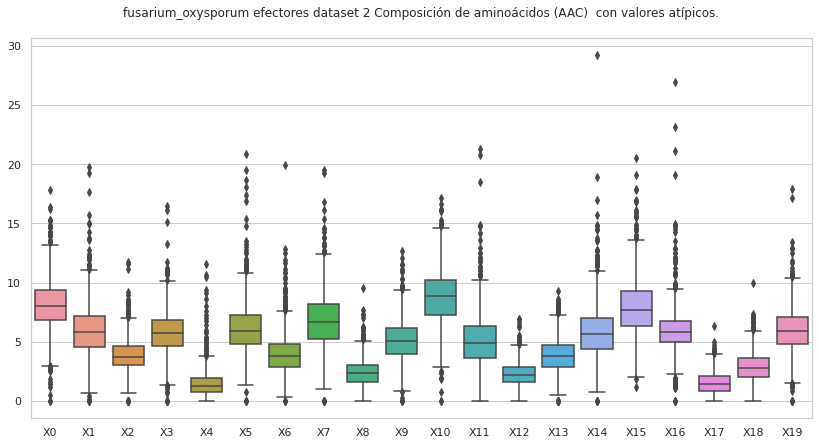

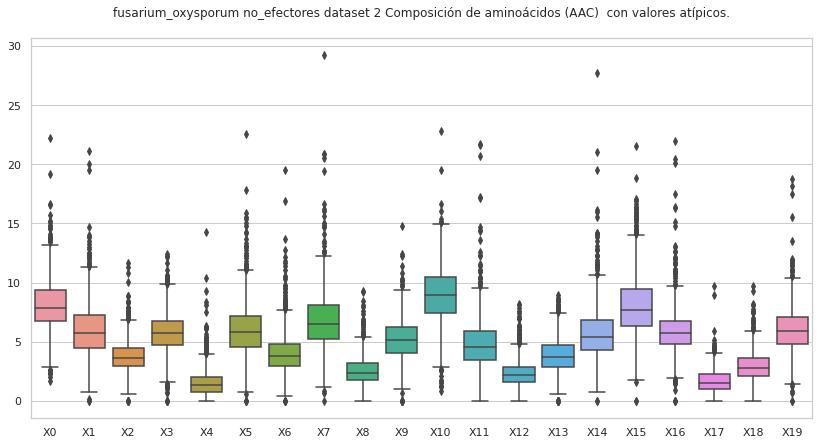

In [3]:
transf = "Composición de aminoácidos (AAC) "
etiq="efectores "
estado = "con valores atípicos.\n"
df=""

for etiq in "efectores", "no_efectores":    
    titulo = (str(transf) + str(etiq) + " " + str(nombre2) + ", " +str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=AAC_efec
        
    if etiq == "no_efectores":
        df=AAC_no_efec    
    
    #del df['X20']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq) +" dataset "+ str(dataset)+" "+str(transf)+" "+str(estado))

## Composición de aminoácidos (AAC), sin valores atípicos

efectores
Composición de aminoácidos (AAC) efectores fusarium_oxysporum dataset 2, sin valores atípicos.
Valores del documento csv.

         X0      X1     X2     X3     X4     X5     X6      X7     X8     X9  \
0     8.029   8.029  2.798  6.204  0.852  7.178  4.136   5.961  3.285  5.596   
2     7.990   7.216  2.835  6.443  0.773  7.216  1.804   7.732  2.062  4.381   
3     9.395   2.389  3.185  3.025  2.707  3.822  2.548   9.395  1.274  7.803   
4    10.940   2.879  3.071  3.071  2.111  4.415  3.263  10.557  1.344  7.678   
5     8.735   2.711  3.614  2.410  2.410  4.819  5.120   7.831  1.205  7.229   
..      ...     ...    ...    ...    ...    ...    ...     ...    ...    ...   
995   8.850   5.752  5.752  6.195  1.770  7.522  3.097   8.407  2.212  5.752   
996   7.616   4.057  3.203  5.267  1.281  5.267  3.274   7.402  2.420  5.694   
997  12.704   5.064  2.575  4.807  1.545  6.266  3.605   7.468  1.717  5.579   
998   8.867  10.099  4.433  4.680  2.709  7.143  3.448   8.374  3.2

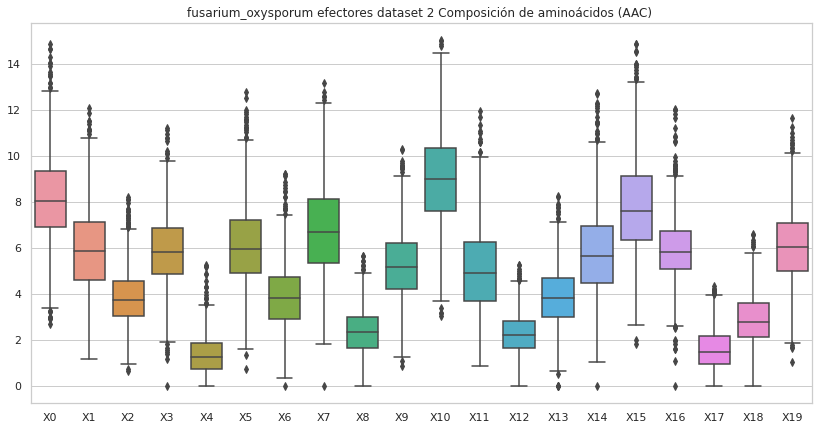

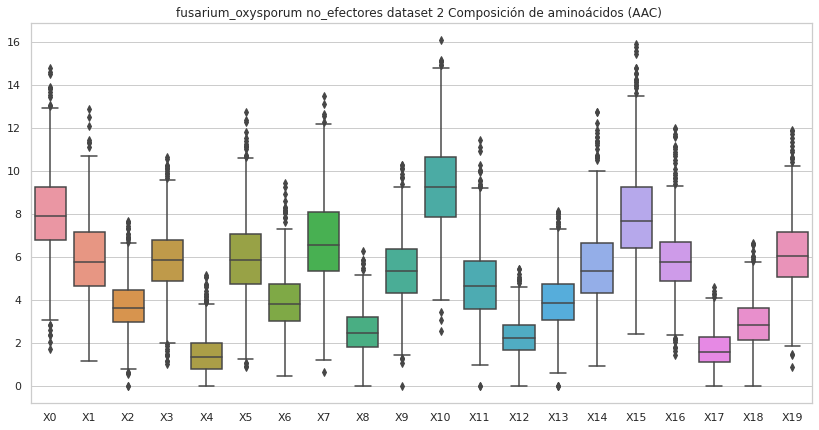

In [4]:
transf = "Composición de aminoácidos (AAC) "
estado = "sin valores atípicos.\n"
transf2="AAC"

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df=""
df_out = pd.DataFrame()


for etiq in "efectores", "no_efectores":    
    titulo = (str(transf) + str(etiq) + " " + str(nombre2) + ", " +str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=AAC_efec
        
    if etiq == "no_efectores":
        df=AAC_no_efec   
    
    del df['X20']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])

    df['X20'] = etiq    
    df_out = pd.concat([df_out,df])
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq) +" dataset "+ str(dataset)+" "+str(transf))

# Composición de pseudo aminoácidos (PseAAC) hidro_mass

efectores
Composición de pseudo aminoácidos (PseAAC)  hidro_mass efectores fusarium_oxysporum dataset 2, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.049017  0.005199  0.037877  0.043818  0.026736  0.036391  0.020052   
1    0.018666  0.028000  0.028000  0.018666  0.000000  0.065332  0.009333   
2    0.057162  0.005532  0.046098  0.051630  0.016595  0.055318  0.014751   
3    0.023804  0.006859  0.007666  0.009683  0.010490  0.023804  0.003228   
4    0.031263  0.006033  0.008776  0.012615  0.019197  0.030166  0.003839   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.061750  0.012350  0.043225  0.052487  0.037050  0.058662  0.015437   
996  0.027739  0.004666  0.019184  0.019184  0.019443  0.026961  0.008814   
997  0.043582  0.005301  0.016490  0.021497  0.009129  0.025619  0.005889   
998  0.030239  0.009240  0.015959  0.024359  0.005040  0.028559  0.010920  

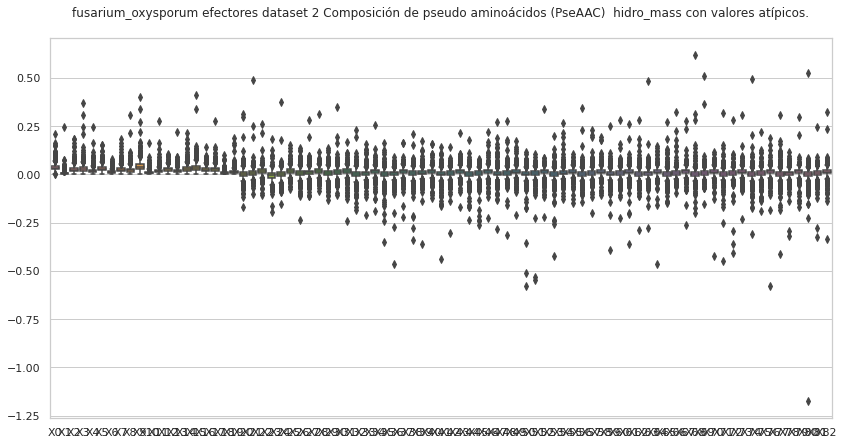

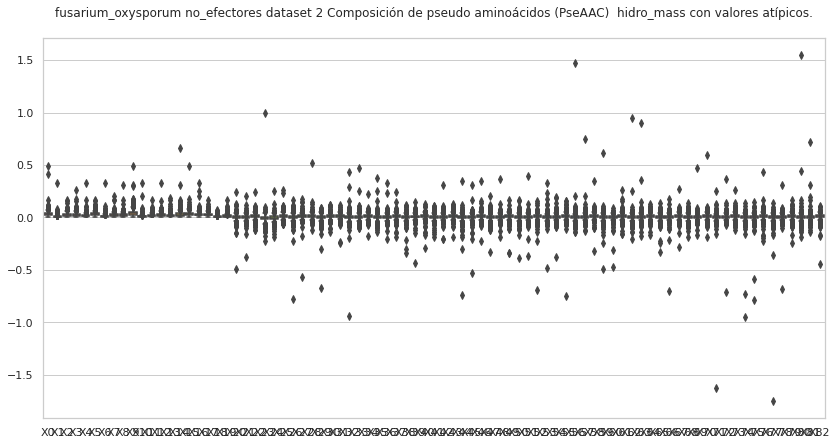

In [5]:
#hidro_mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "con valores atípicos.\n"
comp = "hidro_mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_mass_no_efec

    #del df['X83']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Composición de pseudo aminoácidos (PseAAC) hidro_mass, sin valores atípicos

efectores
Composición de pseudo aminoácidos (PseAAC)  hidro_mass efectores fusarium_oxysporum dataset 2, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.049017  0.005199  0.037877  0.043818  0.026736  0.036391  0.020052   
2    0.057162  0.005532  0.046098  0.051630  0.016595  0.055318  0.014751   
3    0.023804  0.006859  0.007666  0.009683  0.010490  0.023804  0.003228   
4    0.031263  0.006033  0.008776  0.012615  0.019197  0.030166  0.003839   
5    0.030246  0.008344  0.008344  0.016687  0.023988  0.027117  0.004172   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.061750  0.012350  0.043225  0.052487  0.037050  0.058662  0.015437   
996  0.027739  0.004666  0.019184  0.019184  0.019443  0.026961  0.008814   
997  0.043582  0.005301  0.016490  0.021497  0.009129  0.025619  0.005889   
998  0.030239  0.009240  0.015959  0.024359  0.005040  0.028559  0.010920  

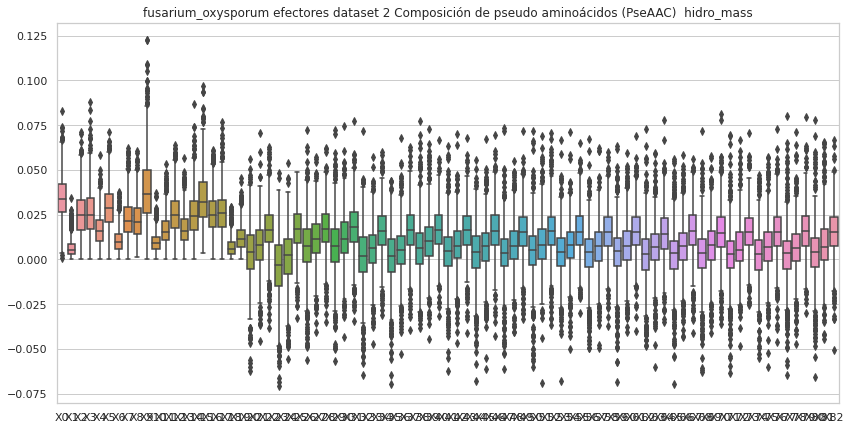

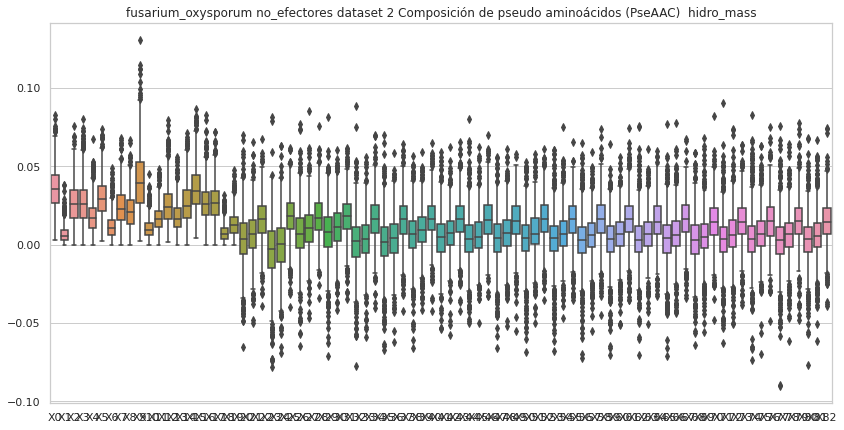

In [6]:
#hidro_mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "sin valores atípicos.\n"
comp = "hidro_mass"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()


for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_mass_no_efec

    del df['X83']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X83'] = etiq    
    df_out = pd.concat([df_out,df])
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Composición de pseudo aminoácidos (PseAAC) mass

efectores
Composición de pseudo aminoácidos (PseAAC)  mass efectores fusarium_oxysporum dataset 2, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.055800  0.005918  0.043118  0.049882  0.030436  0.041427  0.022827   
1    0.016610  0.024915  0.024915  0.016610  0.000000  0.058135  0.008305   
2    0.051787  0.005012  0.041764  0.046775  0.015035  0.050116  0.013364   
3    0.037114  0.010694  0.011952  0.015097  0.016355  0.037114  0.005032   
4    0.048177  0.009297  0.013523  0.019440  0.029583  0.046487  0.005917   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.058077  0.011615  0.040654  0.049365  0.034846  0.055173  0.014519   
996  0.042597  0.007166  0.029460  0.029460  0.029858  0.041403  0.013536   
997  0.044000  0.005351  0.016649  0.021703  0.009216  0.025865  0.005946   
998  0.049110  0.015006  0.025919  0.039561  0.008185  0.046382  0.017734   
999 

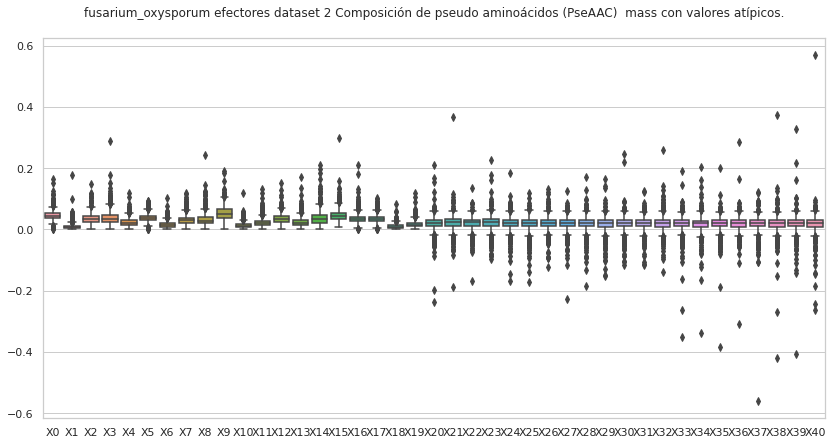

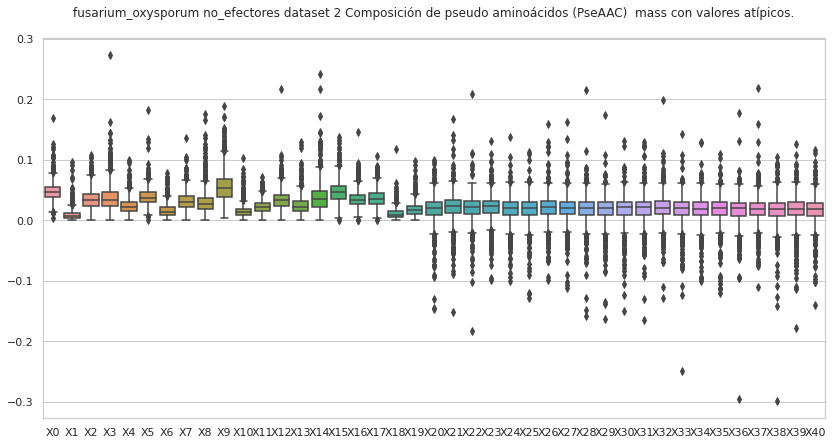

In [7]:
#mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "con valores atípicos.\n"
comp = "mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_mass_no_efec

    #del df['X41']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Composición de pseudo aminoácidos (PseAAC) mass, sin valores atípicos

Composición de pseudo aminoácidos (PseAAC)  mass efectores fusarium_oxysporum dataset 2, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.055800  0.005918  0.043118  0.049882  0.030436  0.041427  0.022827   
2    0.051787  0.005012  0.041764  0.046775  0.015035  0.050116  0.013364   
3    0.037114  0.010694  0.011952  0.015097  0.016355  0.037114  0.005032   
4    0.048177  0.009297  0.013523  0.019440  0.029583  0.046487  0.005917   
5    0.049455  0.013643  0.013643  0.027286  0.039223  0.044339  0.006821   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.058077  0.011615  0.040654  0.049365  0.034846  0.055173  0.014519   
996  0.042597  0.007166  0.029460  0.029460  0.029858  0.041403  0.013536   
997  0.044000  0.005351  0.016649  0.021703  0.009216  0.025865  0.005946   
998  0.049110  0.015006  0.025919  0.039561  0.008185  0.046382  0.017734   
999  0.035961 

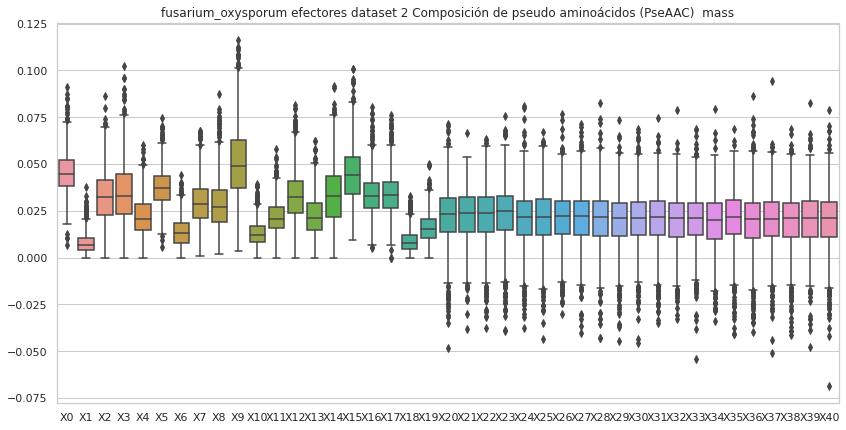

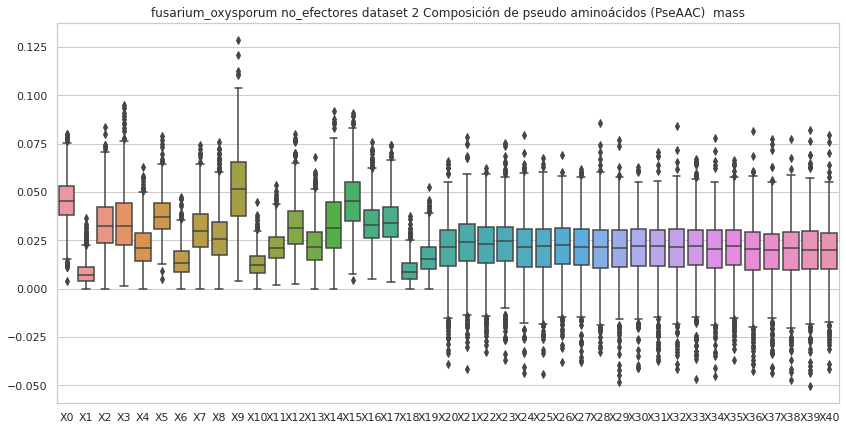

In [8]:
#mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "sin valores atípicos.\n"
comp = "mass"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))

    if etiq == "efectores":
        df=PseAAC_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_mass_no_efec

    del df['X41']
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X41'] = etiq
    df_out = pd.concat([df_out,df])
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Composición de pseudo aminoácidos (PseAAC) hidro

efectores
Composición de pseudo aminoácidos (PseAAC)  hidro efectores fusarium_oxysporum dataset 2, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.066959  0.007102  0.051741  0.059857  0.036523  0.049712  0.027392   
1    0.037219  0.055829  0.055829  0.037219  0.000000  0.130268  0.018610   
2    0.093455  0.009044  0.075367  0.084411  0.027132  0.090440  0.024117   
3    0.038896  0.011207  0.012526  0.015822  0.017141  0.038896  0.005274   
4    0.049091  0.009474  0.013780  0.019809  0.030143  0.047368  0.006029   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.097315  0.019463  0.068121  0.082718  0.058389  0.092450  0.024329   
996  0.038901  0.006544  0.026904  0.026904  0.027267  0.037811  0.012361   
997  0.123614  0.015034  0.046773  0.060972  0.025892  0.072665  0.016705   
998  0.041692  0.012739  0.022004  0.033585  0.006949  0.039376  0.015056   
999

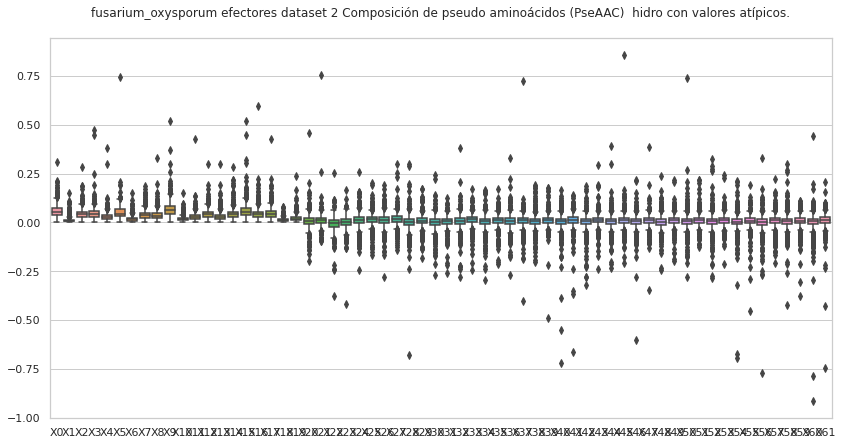

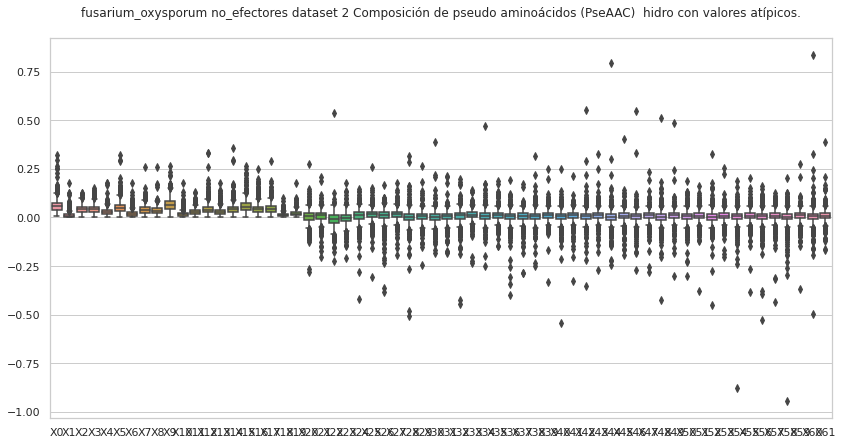

In [9]:
#hidro
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "con valores atípicos.\n"
comp = "hidro"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_no_efec

    #del df['X62']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Composición de pseudo aminoácidos (PseAAC) hidro, sin valores atípicos

efectores
Composición de pseudo aminoácidos (PseAAC)  efectores fusarium_oxysporum dataset 2, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.066959  0.007102  0.051741  0.059857  0.036523  0.049712  0.027392   
2    0.093455  0.009044  0.075367  0.084411  0.027132  0.090440  0.024117   
3    0.038896  0.011207  0.012526  0.015822  0.017141  0.038896  0.005274   
4    0.049091  0.009474  0.013780  0.019809  0.030143  0.047368  0.006029   
5    0.041168  0.011357  0.011357  0.022714  0.032651  0.036910  0.005678   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.097315  0.019463  0.068121  0.082718  0.058389  0.092450  0.024329   
996  0.038901  0.006544  0.026904  0.026904  0.027267  0.037811  0.012361   
997  0.123614  0.015034  0.046773  0.060972  0.025892  0.072665  0.016705   
998  0.041692  0.012739  0.022004  0.033585  0.006949  0.039376  0.015056   
999  0.07

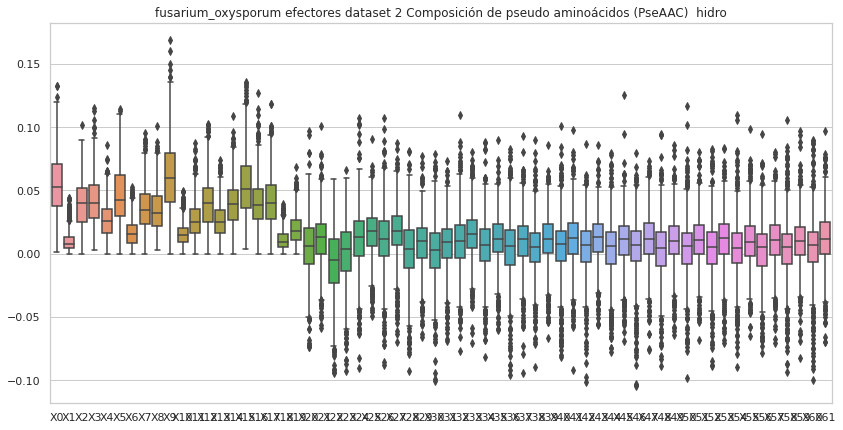

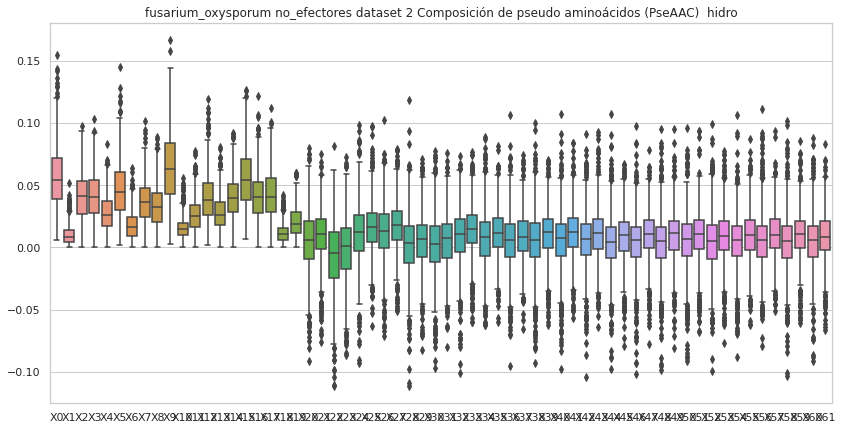

In [10]:
#hidro
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "sin valores atípicos.\n"
comp = "hidro"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()


for etiq in "efectores", "no_efectores":
    titulo = (str(transf) +" "+ str(etiq) + " " + str(nombre2) + ", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_no_efec

    del df['X62']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X62'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Covarianza de auto cruzamiento (ACC) hidro_mass

efectores
Covarianza de auto cruzamiento (ACC)  hidro_mass efectores fusarium_oxysporum dataset 2, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.029254 -0.027115  0.054639 -0.040025 -0.023540  0.057690  0.014828   
1   -0.017197 -0.044290  0.093608  0.101439  0.131142  0.004135 -0.176308   
2   -0.003907 -0.048486 -0.023992 -0.055206 -0.009835 -0.004075  0.006016   
3   -0.045057  0.038780  0.031591  0.077752  0.010091 -0.001557  0.033936   
4   -0.045676  0.057307 -0.012145  0.088963 -0.027765 -0.050090  0.021919   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.001308  0.020169  0.014361 -0.030617  0.108970 -0.063608 -0.066512   
996  0.025264  0.026069  0.012862  0.026300  0.009456  0.025527  0.000527   
997 -0.003600  0.034699  0.029189 -0.008363 -0.013482  0.037532 -0.032246   
998  0.034409 -0.010677  0.009393 -0.027888 -0.001469 -0.137049 -0.044194   
999 

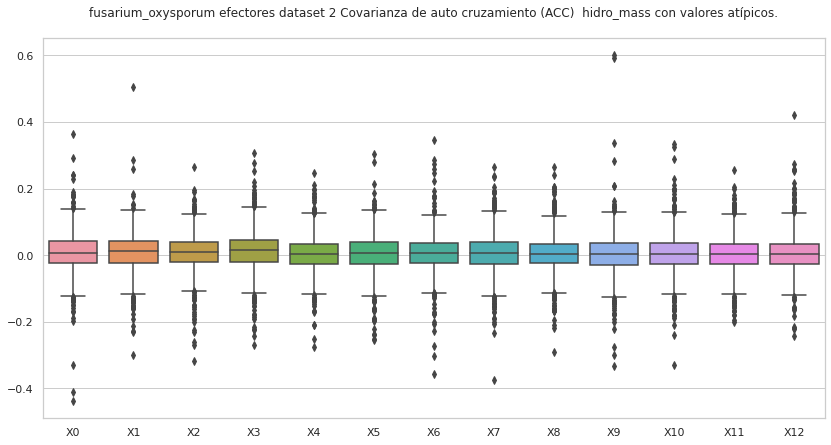

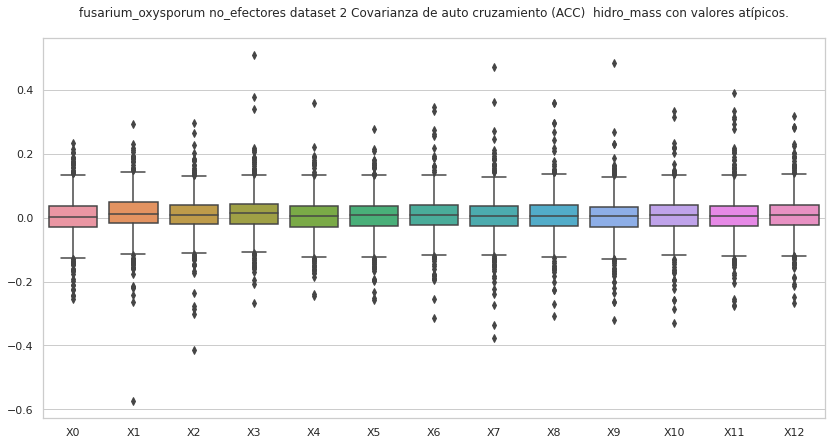

In [11]:
#hidro_mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "con valores atípicos.\n"
comp = "hidro_mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_mass_efec

    if etiq == "no_efectores":
        df=ACC_hidro_mass_no_efec

    #del df['X13']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Covarianza de auto cruzamiento (ACC) hidro_mass, sin valores atípicos

efectores
Covarianza de auto cruzamiento (ACC)  hidro_mass efectores fusarium_oxysporum dataset 2, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.029254 -0.027115  0.054639 -0.040025 -0.023540  0.057690  0.014828   
2   -0.003907 -0.048486 -0.023992 -0.055206 -0.009835 -0.004075  0.006016   
3   -0.045057  0.038780  0.031591  0.077752  0.010091 -0.001557  0.033936   
4   -0.045676  0.057307 -0.012145  0.088963 -0.027765 -0.050090  0.021919   
5   -0.032851  0.040783 -0.077271  0.001231  0.015273 -0.023072 -0.144986   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.001308  0.020169  0.014361 -0.030617  0.108970 -0.063608 -0.066512   
996  0.025264  0.026069  0.012862  0.026300  0.009456  0.025527  0.000527   
997 -0.003600  0.034699  0.029189 -0.008363 -0.013482  0.037532 -0.032246   
998  0.034409 -0.010677  0.009393 -0.027888 -0.001469 -0.137049 -0.044194   
999 

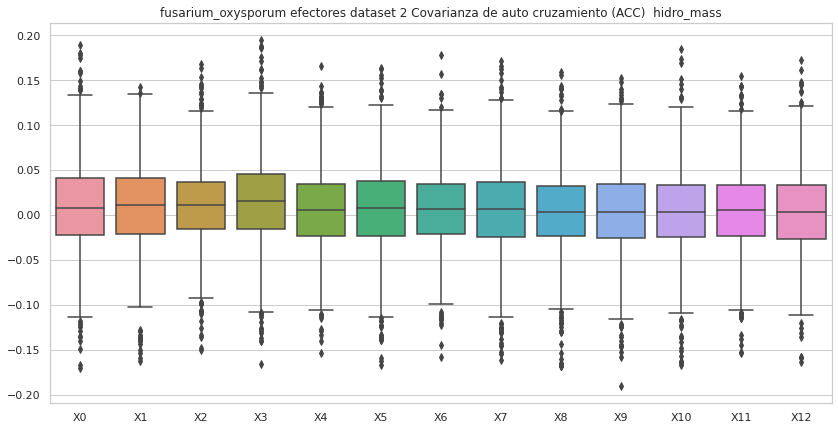

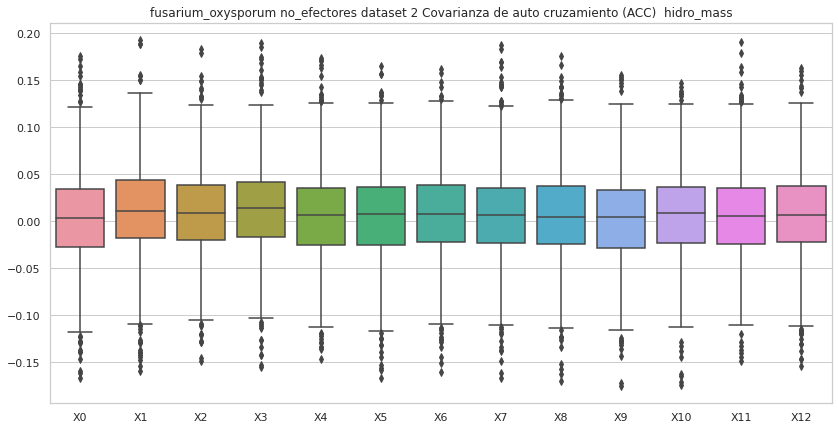

In [12]:
#hidro_mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "sin valores atípicos.\n"
comp = "hidro_mass"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_mass_efec

    if etiq == "no_efectores":
        df=ACC_hidro_mass_no_efec

    del df['X13']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X13'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)

    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Covarianza de auto cruzamiento (ACC) mass

efectores
Covarianza de auto cruzamiento (ACC)  mass efectores fusarium_oxysporum dataset 2, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.029254 -0.027115  0.054639 -0.040025 -0.023540  0.057690  0.014828   
1   -0.017197 -0.044290  0.093608  0.101439  0.131142  0.004135 -0.176308   
2   -0.003907 -0.048486 -0.023992 -0.055206 -0.009835 -0.004075  0.006016   
3   -0.045057  0.038780  0.031591  0.077752  0.010091 -0.001557  0.033936   
4   -0.045676  0.057307 -0.012145  0.088963 -0.027765 -0.050090  0.021919   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.001308  0.020169  0.014361 -0.030617  0.108970 -0.063608 -0.066512   
996  0.025264  0.026069  0.012862  0.026300  0.009456  0.025527  0.000527   
997 -0.003600  0.034699  0.029189 -0.008363 -0.013482  0.037532 -0.032246   
998  0.034409 -0.010677  0.009393 -0.027888 -0.001469 -0.137049 -0.044194   
999  0.043

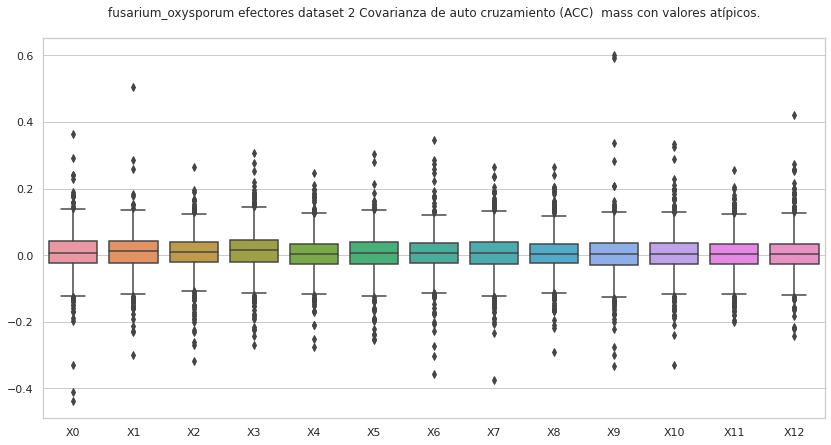

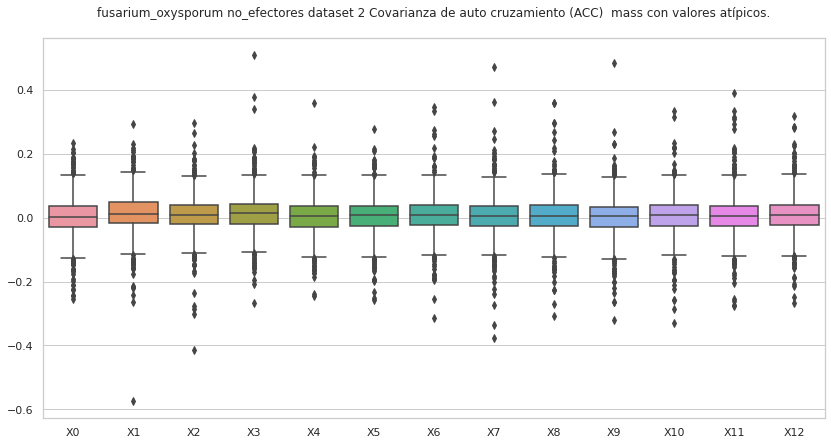

In [13]:
#mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "con valores atípicos.\n"
comp = "mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_mass_efec

    if etiq == "no_efectores":
        df=ACC_mass_no_efec

    #del df['X13']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Covarianza de auto cruzamiento (ACC) mass, sin valores atípicos

Covarianza de auto cruzamiento (ACC)  mass efectores fusarium_oxysporum dataset 2, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.029254 -0.027115  0.054639 -0.040025 -0.023540  0.057690  0.014828   
2   -0.003907 -0.048486 -0.023992 -0.055206 -0.009835 -0.004075  0.006016   
3   -0.045057  0.038780  0.031591  0.077752  0.010091 -0.001557  0.033936   
4   -0.045676  0.057307 -0.012145  0.088963 -0.027765 -0.050090  0.021919   
5   -0.032851  0.040783 -0.077271  0.001231  0.015273 -0.023072 -0.144986   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.001308  0.020169  0.014361 -0.030617  0.108970 -0.063608 -0.066512   
996  0.025264  0.026069  0.012862  0.026300  0.009456  0.025527  0.000527   
997 -0.003600  0.034699  0.029189 -0.008363 -0.013482  0.037532 -0.032246   
998  0.034409 -0.010677  0.009393 -0.027888 -0.001469 -0.137049 -0.044194   
999  0.043652  0.025

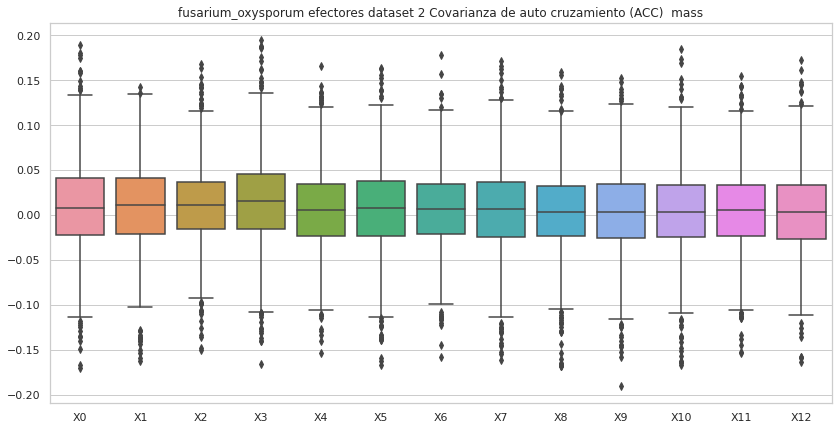

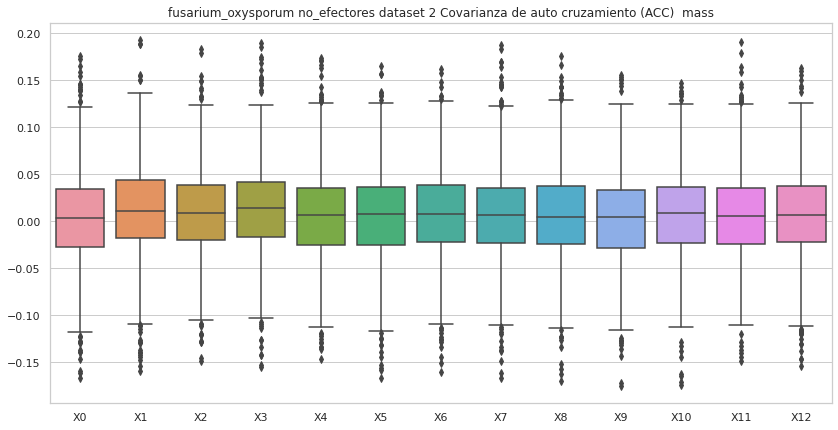

In [14]:
#mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "sin valores atípicos.\n"
comp = "mass"
df=""

#Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df=""
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))

    if etiq == "efectores":
        df=ACC_mass_efec

    if etiq == "no_efectores":
        df=ACC_mass_no_efec

    del df['X13']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X13'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)    

    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Covarianza de auto cruzamiento (ACC) hidro

efectores
Covarianza de auto cruzamiento (ACC)  hidro efectores fusarium_oxysporum dataset 2, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0   -0.094137 -0.065201 -0.019587 -0.040861 -0.011276  0.033596  0.021987   
1    0.125398  0.097842  0.168729 -0.049869  0.029677  0.078909  0.150173   
2   -0.032418 -0.128094  0.042796  0.012409 -0.024097 -0.061371  0.031789   
3    0.044149 -0.014993  0.067450  0.070612  0.082249 -0.010255  0.035898   
4    0.051764  0.114512  0.033180  0.059411  0.041010  0.084905  0.025737   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.033738 -0.100029  0.078302  0.032144 -0.115762 -0.072146 -0.020075   
996  0.079593  0.027876  0.083336  0.049230 -0.011094  0.074444  0.087196   
997 -0.021456 -0.033678  0.000266 -0.007823 -0.062855 -0.027728  0.015990   
998  0.025784 -0.048446  0.067398  0.035877 -0.009344 -0.036641 -0.019036   
999 -0.07

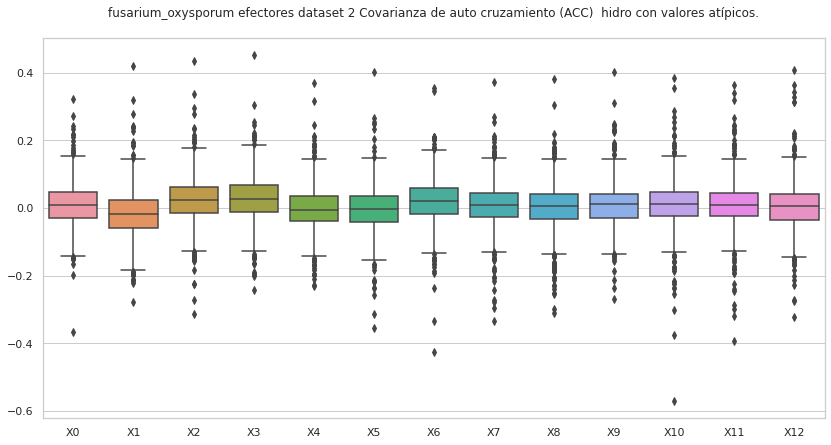

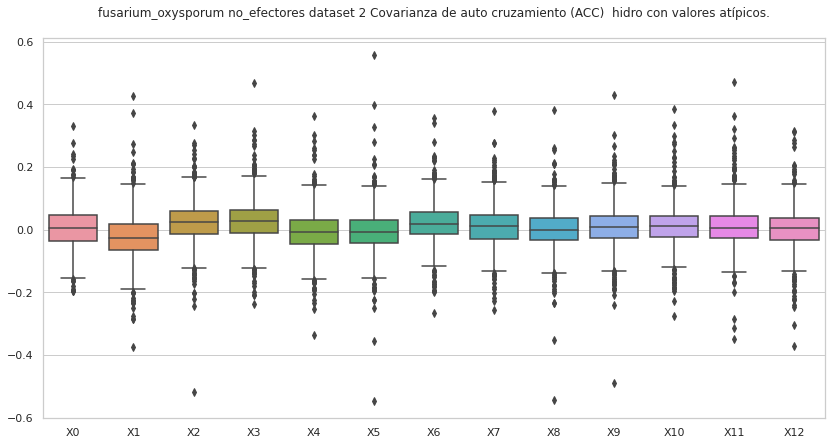

In [15]:
#hidro
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "con valores atípicos.\n"
comp = "hidro"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_efec

    if etiq == "no_efectores":
        df=ACC_hidro_no_efec

    #del df['X13']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Covarianza de auto cruzamiento (ACC) hidro, sin valores atípicos

efectores
Covarianza de auto cruzamiento (ACC)  efectores fusarium_oxysporum dataset 2, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0   -0.094137 -0.065201 -0.019587 -0.040861 -0.011276  0.033596  0.021987   
2   -0.032418 -0.128094  0.042796  0.012409 -0.024097 -0.061371  0.031789   
3    0.044149 -0.014993  0.067450  0.070612  0.082249 -0.010255  0.035898   
4    0.051764  0.114512  0.033180  0.059411  0.041010  0.084905  0.025737   
5    0.103107  0.043424  0.030739  0.068554  0.105321  0.033849  0.091880   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.033738 -0.100029  0.078302  0.032144 -0.115762 -0.072146 -0.020075   
996  0.079593  0.027876  0.083336  0.049230 -0.011094  0.074444  0.087196   
997 -0.021456 -0.033678  0.000266 -0.007823 -0.062855 -0.027728  0.015990   
998  0.025784 -0.048446  0.067398  0.035877 -0.009344 -0.036641 -0.019036   
999 -0.076676 -

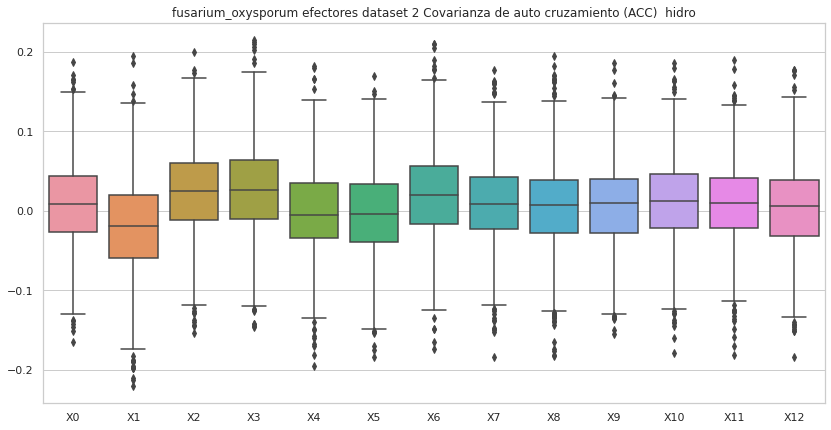

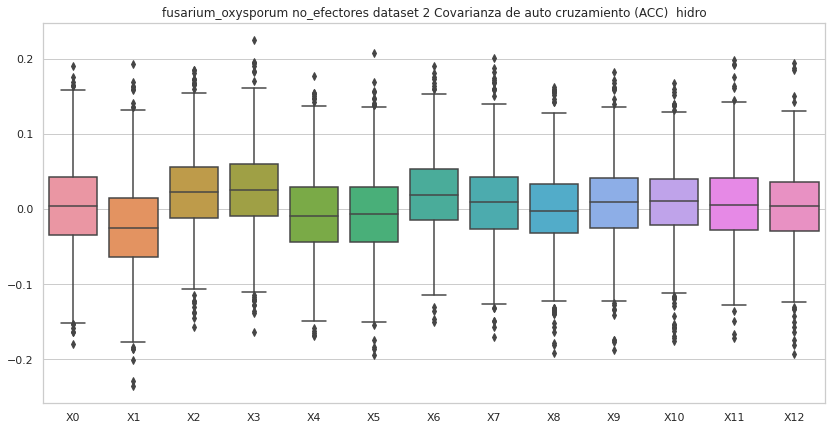

In [16]:
#hidro
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "sin valores atípicos.\n"
comp = "hidro"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf) +" "+ str(etiq) + " " + str(nombre2) + ", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_efec

    if etiq == "no_efectores":
        df=ACC_hidro_no_efec

    del df['X13']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X13'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))